In [2]:
# coding: utf-8
import sys
sys.path.append('../예제/')
sys.path.append('../예제/ch05')
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from dataset import ptb
from simple_rnnlm import SimpleRnnlm

In [3]:
# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100  # RNN의 은닉 상태 벡터의 원소 수
time_size = 5  # RNN을 펼치는 크기
lr = 0.1
max_epoch = 100

In [4]:
# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000  # 테스트 데이터셋을 작게 설정
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)
xs = corpus[:-1]  # 입력
ts = corpus[1:]  # 출력（정답 레이블）

| 에폭 1 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 416.75
| 에폭 2 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 395.54
| 에폭 3 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 272.70
| 에폭 4 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 220.75
| 에폭 5 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 208.89
| 에폭 6 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 207.07
| 에폭 7 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 200.26
| 에폭 8 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 198.87
| 에폭 9 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 193.56
| 에폭 10 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 189.09
| 에폭 11 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 190.63
| 에폭 12 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 187.14
| 에폭 13 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 190.64
| 에폭 14 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 184.96
| 에폭 15 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 184.40
| 에폭 16 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 188.89
| 에폭 17 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 187.47
| 에폭 18 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 181.54
| 에폭 19 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 180.86
| 에폭 20 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 179.87
| 에폭 21 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 177.06
| 에폭 22 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 174.

C:\Users\inp032\.conda\envs\yyc\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inp032\.conda\envs\yyc\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inp032\.conda\envs\yyc\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inp032\.conda\envs\yyc\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inp032\.conda\envs\yyc\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47113 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inp032\.conda\envs\yyc\lib\site-packages\matplotlib\backends\backend_agg.py:240: 

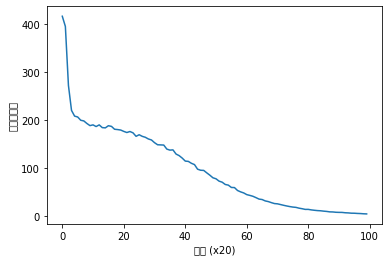

In [5]:
# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

trainer.fit(xs, ts, max_epoch, batch_size, time_size)
trainer.plot()